In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Making clusters

from sklearn.datasets import make_blobs
X, y= make_blobs( n_samples=1000, centers=3, n_features=2)

In [3]:
X

array([[-4.9943421 , -3.03391821],
       [-7.12796735, -0.90014325],
       [ 6.94007462, -4.37852129],
       ...,
       [ 8.07574585, -4.61229083],
       [-6.63479499, -1.39520934],
       [ 9.22286737, -5.04950453]], shape=(1000, 2))

In [4]:
y

array([2, 2, 1, 2, 2, 2, 1, 2, 2, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       2, 1, 0, 1, 0, 1, 1, 2, 2, 2, 1, 2, 1, 0, 2, 2, 0, 0, 0, 0, 1, 2,
       1, 1, 2, 0, 1, 1, 0, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 0, 0, 0, 2, 0,
       2, 2, 2, 1, 1, 0, 1, 0, 1, 0, 2, 0, 2, 0, 0, 1, 2, 0, 0, 2, 0, 0,
       2, 2, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 2, 1, 2, 2, 2, 0, 2, 1,
       1, 2, 2, 2, 0, 2, 1, 1, 0, 2, 1, 1, 0, 0, 1, 2, 0, 0, 2, 1, 1, 0,
       1, 2, 0, 2, 0, 2, 2, 2, 1, 1, 1, 0, 2, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 2, 0, 2, 0, 1, 0, 2, 2, 1, 0, 0, 0, 2, 1, 1, 0, 0, 0, 2,
       2, 1, 2, 1, 2, 0, 0, 1, 2, 1, 2, 2, 2, 1, 0, 1, 0, 0, 1, 1, 0, 2,
       2, 0, 0, 2, 0, 0, 1, 0, 0, 1, 1, 1, 0, 2, 2, 2, 2, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 2, 0, 1, 0, 1, 2, 2, 0, 1, 0, 2, 2, 2, 1, 1, 1, 0,
       2, 1, 2, 0, 2, 1, 2, 1, 2, 0, 1, 0, 0, 1, 2, 0, 0, 2, 0, 1, 0, 0,
       2, 1, 1, 1, 2, 1, 2, 1, 2, 2, 2, 0, 1, 0, 0, 0, 0, 0, 0, 1, 2, 0,
       2, 1, 1, 0, 2, 2, 2, 1, 2, 1, 0, 1, 0, 2, 2,

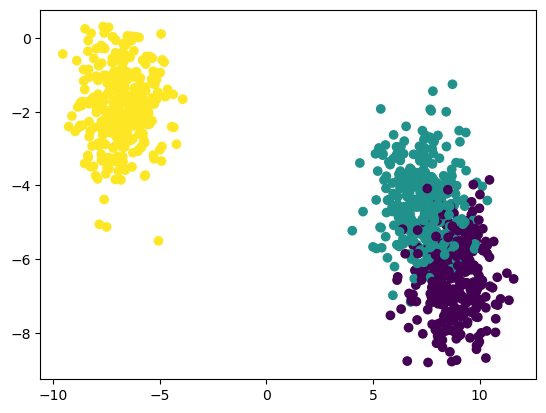

In [5]:
plt.scatter(X[:,0], X[:,1], c=y)

In [6]:
# Standardizing our Data

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [7]:
# Splitting our data into Train, Test, Splits

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.25)

In [8]:
X_train.shape, X_test.shape

((750, 2), (250, 2))

In [9]:
X_train_scaled  = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
from sklearn.cluster import KMeans

wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(X_train_scaled)
    wcss.append(kmeans.inertia_)

In [11]:
wcss

[1500.0,
 291.54383175680135,
 139.74330147022897,
 103.21353510375123,
 73.8142529283371,
 64.71962063716629,
 50.294614136051436,
 41.08453478141687,
 37.772804616987095,
 33.209911084558726]

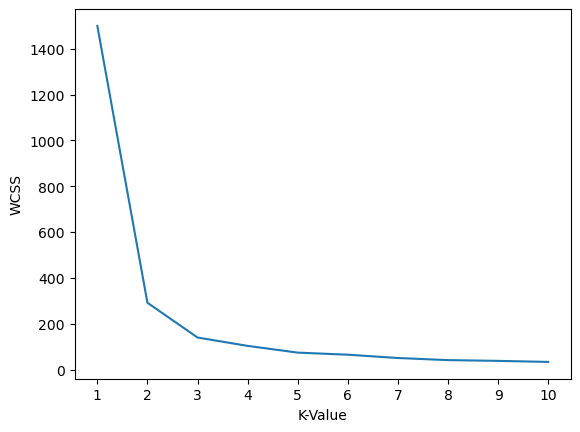

In [12]:
# Plotting our Elbow Curve

plt.xlabel('K-Value')
plt.ylabel('WCSS')
plt.plot(range(1,11), wcss)
plt.xticks(range(1,11))
plt.show()

In [13]:
kmeans=KMeans(n_clusters=3, init='k-means++')

In [14]:
kmeans.fit_predict(X_test_scaled)

array([0, 0, 2, 0, 1, 0, 2, 0, 2, 2, 2, 2, 1, 1, 1, 1, 0, 2, 0, 0, 0, 2,
       1, 2, 0, 0, 2, 1, 1, 1, 1, 0, 2, 1, 2, 2, 1, 0, 0, 1, 0, 0, 2, 1,
       0, 0, 0, 0, 1, 1, 2, 2, 1, 1, 1, 0, 2, 0, 0, 2, 1, 2, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 2, 1, 1, 0, 0, 0, 0, 2, 2, 1, 2, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 2, 0, 0, 1, 2, 1, 0, 0, 1, 0, 1, 0, 2, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 2, 0, 1, 0, 2, 2, 0, 1, 1, 1, 0, 0, 2, 2,
       1, 2, 2, 2, 1, 2, 2, 2, 0, 0, 1, 2, 2, 0, 0, 1, 2, 1, 1, 1, 0, 0,
       2, 2, 1, 0, 2, 0, 2, 0, 0, 2, 0, 0, 1, 1, 2, 0, 0, 2, 0, 0, 1, 0,
       1, 2, 0, 0, 0, 0, 2, 1, 0, 1, 0, 1, 0, 1, 1, 2, 2, 1, 0, 1, 2, 1,
       2, 0, 2, 2, 0, 2, 1, 0, 2, 0, 2, 2, 0, 1, 2, 1, 1, 2, 2, 0, 0, 2,
       1, 2, 1, 2, 1, 0, 1, 1, 2, 0, 0, 1, 1, 1, 0, 2, 0, 2, 1, 2, 0, 2,
       0, 1, 0, 2, 0, 1, 2, 0], dtype=int32)

In [15]:
y_pred=kmeans.predict(X_test_scaled)

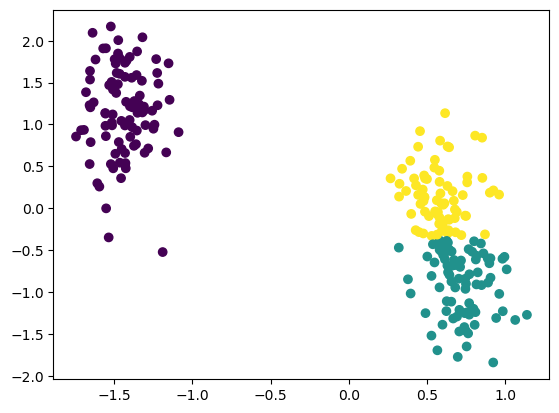

In [16]:
plt.scatter(X_test_scaled[:,0], X_test_scaled[:,1], c=y_pred)

In [17]:
# Validating the K Value

!pip install kneed

In [18]:
from kneed import KneeLocator
kl=KneeLocator(range(1,11), wcss, curve="convex", direction="decreasing")

In [19]:
kl.elbow

np.int64(2)

In [31]:
# Silhoutte Scoring

from sklearn.metrics import silhouette_score
silhouette_coefficients=[]
for k in range(2,11):
    kmeans=KMeans(n_clusters=k, init='k-means++')
    kmeans.fit(X_train_scaled)
    score=silhouette_score(X_train_scaled, kmeans.labels_)
    silhouette_coefficients.append(score)

In [32]:
silhouette_coefficients

[np.float64(0.5491390535763352),
 np.float64(0.76824718932478),
 np.float64(0.620868944457788),
 np.float64(0.49433458291213084),
 np.float64(0.36255094093493606),
 np.float64(0.35583551025078336),
 np.float64(0.3659379122862068),
 np.float64(0.33911195873064903),
 np.float64(0.3210607432854711)]

([<matplotlib.axis.XTick at 0x16a3f3f80>,
 [Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10')])

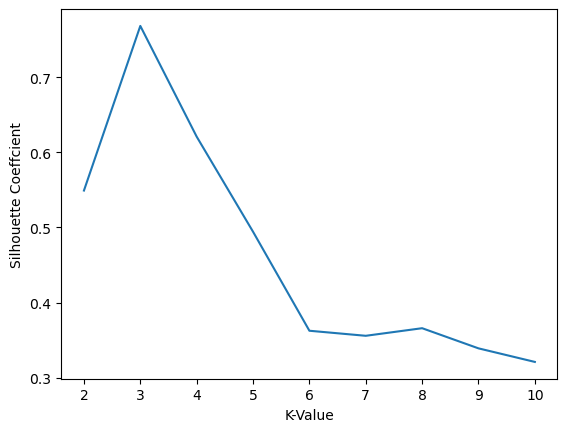

In [33]:
# plotting our silhouette coefficients

plt.xlabel('K-Value')
plt.ylabel('Silhouette Coeffcient')
plt.plot(range(2,11), silhouette_coefficients)
plt.xticks(range(2,11))

We select the one with the highest silhouette score